Data Loading and Preprocessing:

In [2]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.


In [3]:
import os
import zipfile
import numpy as np
from PIL import Image
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [4]:
# Unzip the dataset
import zipfile
zip_file_path = r'C:\Users\atifi\Downloads\mord_data_scientist_take_home.zip'

# Check if the ZIP file exists
if os.path.exists(zip_file_path):
    # Unzip the dataset
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall()
else:
    print("Error: The ZIP file does not exist at the specified location.")

In [5]:
train_dir = 'mord_data_scientist_take_home/train'
validation_dir = 'mord_data_scientist_take_home/validation'

In [6]:
# Preprocess the images  #generators
image_size = (224, 224) 
batch_size = 32  

train_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 4000 images belonging to 2 classes.


In [7]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_directory(
    validation_dir,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical'
)

Found 1000 images belonging to 2 classes.


2. Model Building

In [8]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

In [14]:
# Define the model
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(2, activation='softmax'))

In [15]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [16]:
# Display the model summary
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_3 (Conv2D)                    │ (None, 222, 222, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 111, 111, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 109, 109, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 54, 54, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_5 (Conv2D)                    │ (None, 52, 52, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 26, 26, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 86528)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 128)                 │      11,075,712 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 2)                   │             258 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,169,218 (42.61 MB)

 Trainable params: 11,169,218 (42.61 MB)

 Non-trainable params: 0 (0.00 B)

 3. Model Training

In [21]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [24]:
class CustomPyDataset(tf.keras.utils.Sequence):
    def __init__(self, images, labels, batch_size):
        super().__init__()
        self.images = images
        self.labels = labels
        self.batch_size = batch_size
        self.indexes = np.arange(len(self.images))

    def __len__(self):
        return len(self.images) // self.batch_size

    def __getitem__(self, index):
        start_index = index * self.batch_size
        end_index = (index + 1) * self.batch_size
        batch_images = self.images[start_index:end_index]
        batch_labels = self.labels[start_index:end_index]
        return batch_images, batch_labels

    def on_epoch_end(self):
        np.random.shuffle(self.indexes)


In [27]:
# Train the model using the generators
history = model.fit(
    train_generator,
    epochs=10,
    validation_data=validation_generator
)


Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.8242 - loss: 0.3792 - val_accuracy: 0.6930 - val_loss: 0.6464
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.8803 - loss: 0.2842 - val_accuracy: 0.7280 - val_loss: 0.6122
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9165 - loss: 0.2151 - val_accuracy: 0.7180 - val_loss: 0.7634
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 279s 2s/step - accuracy: 0.9503 - loss: 0.1340 - val_accuracy: 0.7230 - val_loss: 0.8482
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9709 - loss: 0.0766 - val_accuracy: 0.7220 - val_loss: 0.9511
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 272s 2s/step - accuracy: 0.9781 - loss: 0.0626 - val_accuracy: 0.7140 - val_loss: 1.3127
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9879 - loss: 0.0394 - val_accuracy: 0.7210 - val_loss: 1.3786
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 281s 2s/step - accuracy: 0.9904 - loss: 0.0322 - val_accu

In [28]:
# Evaluate model performance on validation data
val_loss, val_acc = model.evaluate(validation_generator)
print("Validation Loss:", val_loss)

32/32 ━━━━━━━━━━━━━━━━━━━━ 8s 232ms/step - accuracy: 0.7329 - loss: 1.5075
Validation Loss: 1.4389533996582031


In [29]:
print("Validation Accuracy:", val_acc)

Validation Accuracy: 0.7310000061988831


In [30]:
# Visualize training progress
import matplotlib.pyplot as plt

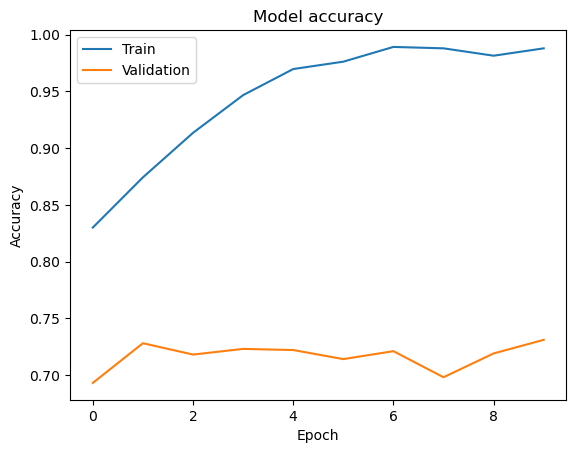

In [31]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

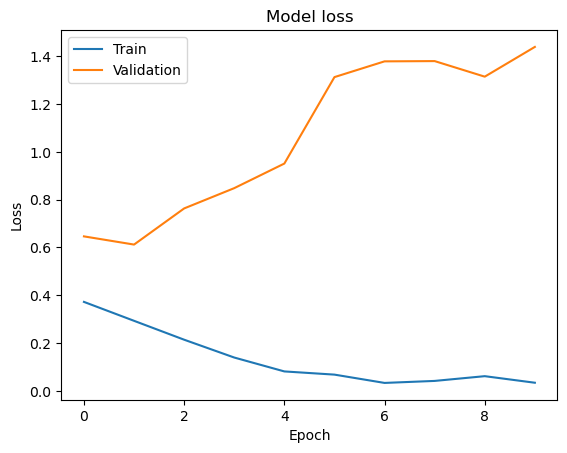

In [32]:
# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()